In [2]:
# notebook to illustrate text indexing and basic search

In [3]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [4]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [5]:
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")

content_directory =  data_sets/recipes/txt/
text_filename_pattern =  ??.txt
self.documents populated =  22


In [28]:
# first clear index
tmt.index_search.delete_indices(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)

    # remove stop words
    #el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_search.update_wordcount_index(cr.content_directory, document_name, dl)
    pass

removed wordcount index file:  data_sets/recipes/txt/index.wordcount
removed relevance index file:  data_sets/recipes/txt/index.relevance
processing  00.txt
processing  01.txt
processing  02.txt
processing  03.txt
processing  04.txt


processing  05.txt
processing  06.txt
processing  07.txt
processing  08.txt
processing  09.txt
processing  10.txt
processing  11.txt
processing  12.txt
processing  13.txt


processing  14.txt
processing  15.txt
processing  16.txt
processing  17.txt
processing  18.txt
processing  19.txt
processing  20.txt
processing  21.txt


In [30]:
# create relevance index
tmt.index_search.calculate_relevance_index(cr.content_directory)

In [31]:
tmt.index_search.print_index(cr.content_directory)

            00.txt  01.txt   ...    20.txt  21.txt
a              2.0     4.0   ...       2.0     7.0
nutritious     1.0     0.0   ...       0.0     0.0
moment         1.0     0.0   ...       0.0     0.0
and            5.0     4.0   ...       6.0     5.0
crumbs         1.0     0.0   ...       2.0     0.0
previously     1.0     0.0   ...       0.0     0.0
small          1.0     2.0   ...       0.0     0.0
all            1.0     0.0   ...       0.0     0.0
salt           1.0     1.0   ...       0.0     1.0
place          1.0     0.0   ...       0.0     0.0

[10 rows x 22 columns]
              00.txt    01.txt    ...       20.txt    21.txt
a           0.000214  0.000283    ...     0.000204  0.000427
nutritious  0.010955  0.000000    ...     0.000000  0.000000
moment      0.009473  0.000000    ...     0.000000  0.000000
and         0.000000  0.000000    ...     0.000000  0.000000
crumbs      0.007669  0.000000    ...     0.014641  0.000000
previously  0.010433  0.000000    ...     0.00000

In [32]:
tmt.index_search.search_index(cr.content_directory, "rice")

matching_documents 04.txt    0.002012
05.txt    0.024404
06.txt    0.031860
Name: rice, dtype: float64


[('06.txt', 0.031860350088608921),
 ('05.txt', 0.02440367240829619),
 ('04.txt', 0.0020122326371753)]

In [35]:
words_by_relevance = tmt.index_search.get_words_by_relevance(cr.content_directory)
words_by_relevance.most_common(10)

[('sauce', 0.072479554515290895),
 ('them', 0.070833510080924769),
 ('little', 0.062832341904529035),
 ('rice', 0.058276255134080412),
 ('butter', 0.057278834991103734),
 ('bread', 0.055933326383546908),
 ('they', 0.054793552703163897),
 ('quantity', 0.051914014707442335),
 ('together', 0.050062707525060902),
 ('grated', 0.048860949578921925)]

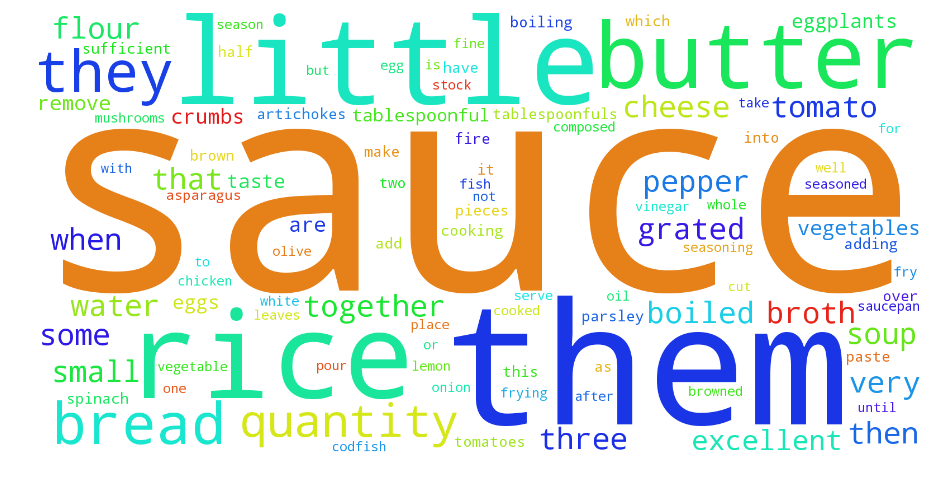

In [36]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance)